In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#Step:1 Data Load and Data Overview
# Correct path for your CSV files
dataset_path = '/kaggle/input/store-sales-time-series-forecasting'

# Load the datasets
train_data = pd.read_csv(f"{dataset_path}/train.csv")
test_data = pd.read_csv(f"{dataset_path}/test.csv")

# Display the first few rows of the training data
print("\nFirst few rows of training data:")
print(train_data.head())

# Display information about the training data
print("\nTraining data info:")
print(train_data.info())

# Display the first few rows of the test data
print("\nFirst few rows of test data:")
print(test_data.head())

# Display information about the test data
print("\nTest data info:")
print(test_data.info())


First few rows of training data:
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None

First few rows of test data:
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY C

In [7]:
# Check for missing values
print(train_data.isnull().sum())



id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [8]:
# Check data types
print(train_data.dtypes)


id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object


In [10]:
# Step 2: Data Preprocessing

# 1. Ensure 'date' column is in datetime format
train_data['date'] = pd.to_datetime(train_data['date'])

# 2. Feature Engineering
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day
train_data['weekday'] = train_data['date'].dt.weekday

# Display the first few rows after feature engineering
print(train_data.head())


   id       date  store_nbr      family  sales  onpromotion  year  month  day  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1    1   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013      1    1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013      1    1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013      1    1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013      1    1   

   weekday  
0        1  
1        1  
2        1  
3        1  
4        1  


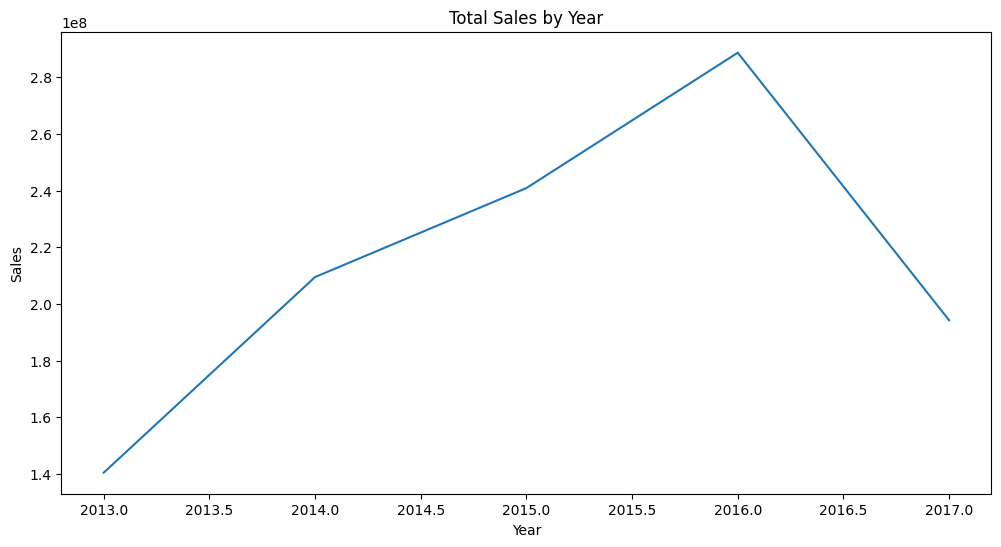

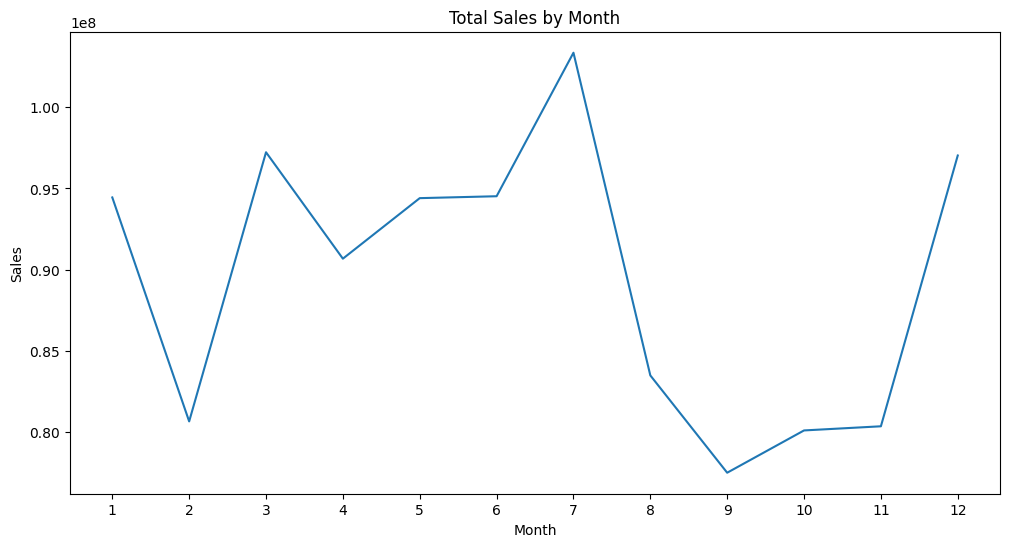

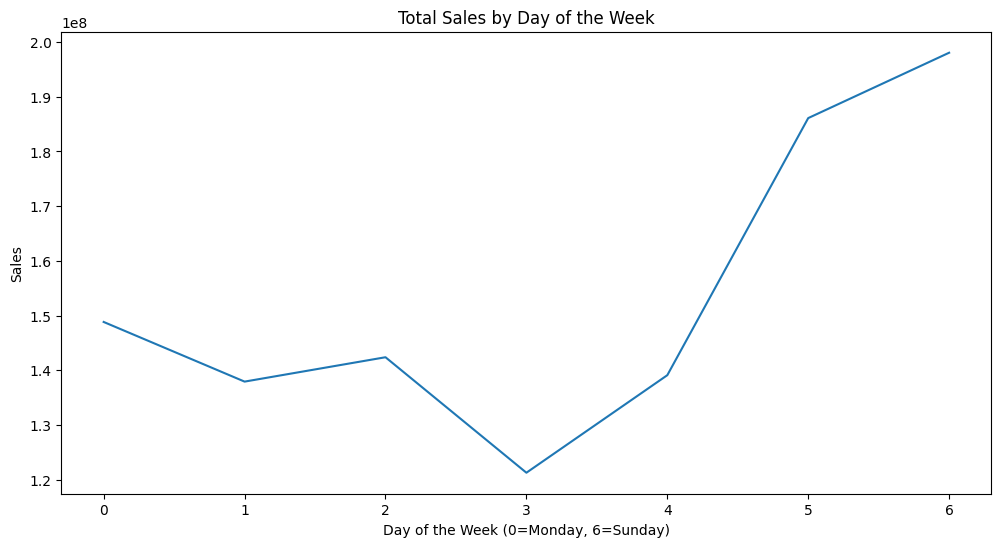

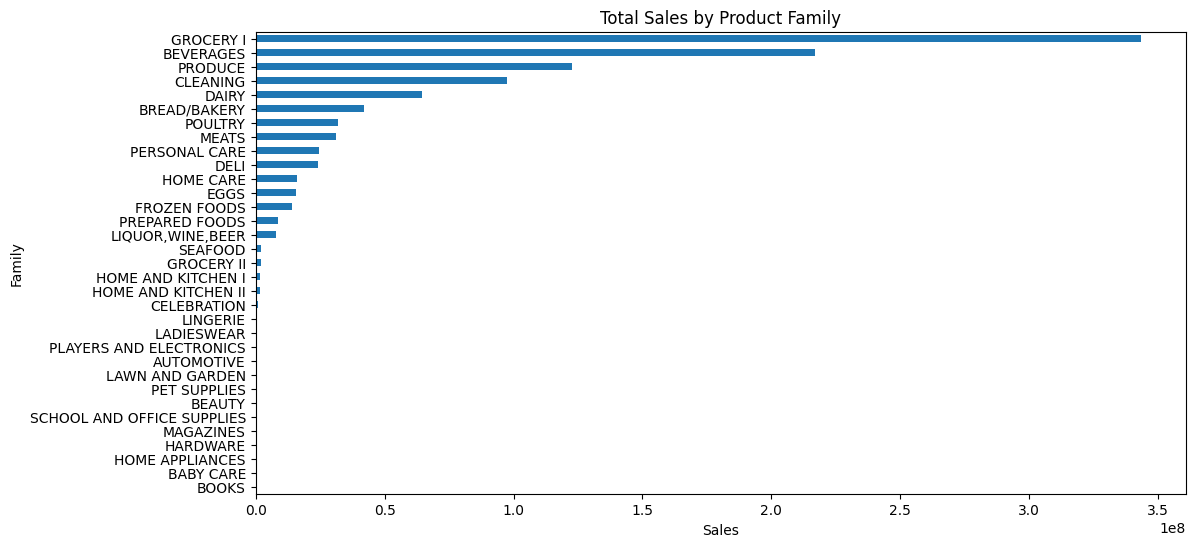

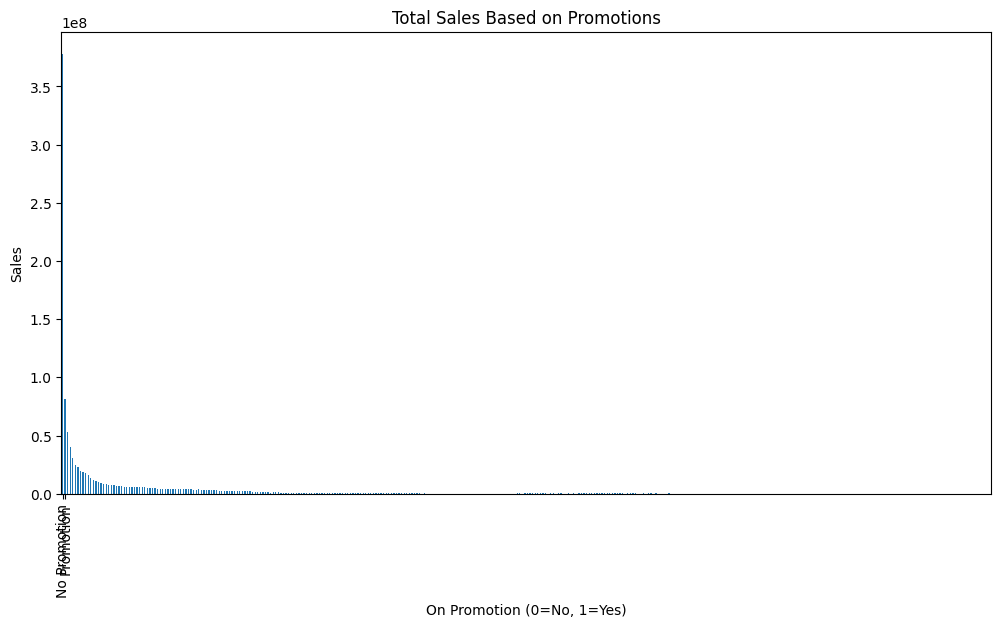

In [11]:
# Step 3: Exploratory Data Analysis (EDA)

# 1. Sales Trends by Year
plt.figure(figsize=(12, 6))
train_data.groupby('year')['sales'].sum().plot()
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# 2. Sales Trends by Month
plt.figure(figsize=(12, 6))
train_data.groupby('month')['sales'].sum().plot()
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13))  # Set x-ticks to each month
plt.show()

# 3. Sales Trends by Day of the Week
plt.figure(figsize=(12, 6))
train_data.groupby('weekday')['sales'].sum().plot()
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Sales')
plt.xticks(range(0, 7))  # Set x-ticks for weekdays
plt.show()

# 4. Sales by Product Family
plt.figure(figsize=(12, 6))
train_data.groupby('family')['sales'].sum().sort_values().plot(kind='barh')
plt.title('Total Sales by Product Family')
plt.xlabel('Sales')
plt.ylabel('Family')
plt.show()

# 5. Sales During Promotions
plt.figure(figsize=(12, 6))
train_data.groupby('onpromotion')['sales'].sum().plot(kind='bar')
plt.title('Total Sales Based on Promotions')
plt.xlabel('On Promotion (0=No, 1=Yes)')
plt.ylabel('Sales')
plt.xticks(range(2), ['No Promotion', 'Promotion'])
plt.show()


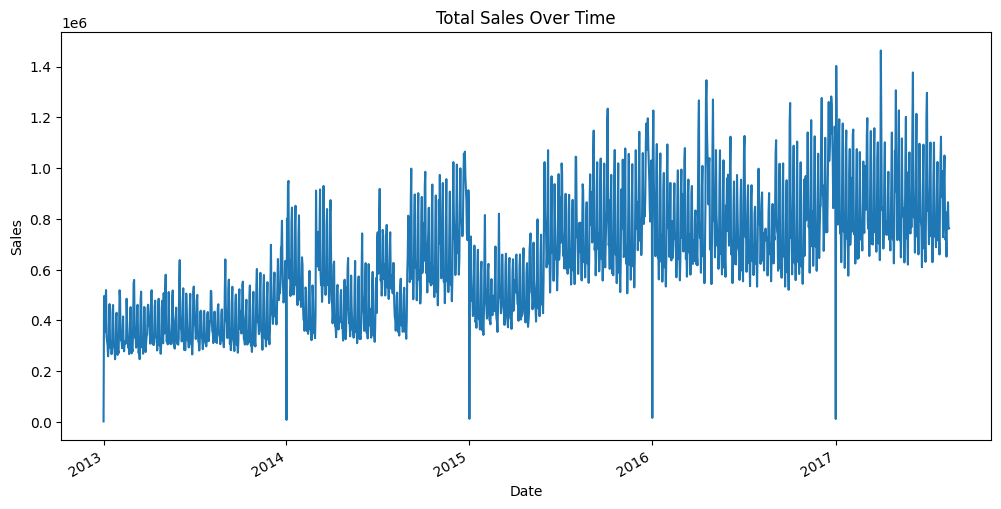

In [9]:
import matplotlib.pyplot as plt

# Convert date column to datetime type if needed
train_data['date'] = pd.to_datetime(train_data['date'])

# Plot sales over time
plt.figure(figsize=(12, 6))
train_data.groupby('date')['sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


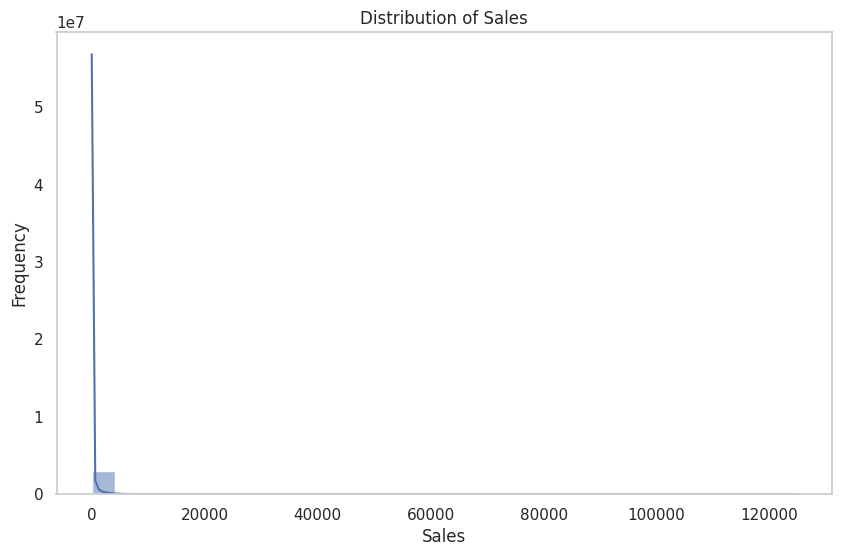

In [2]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")
# Visualize the distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(train_data['sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid()
plt.show()



Data types of columns:
id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object


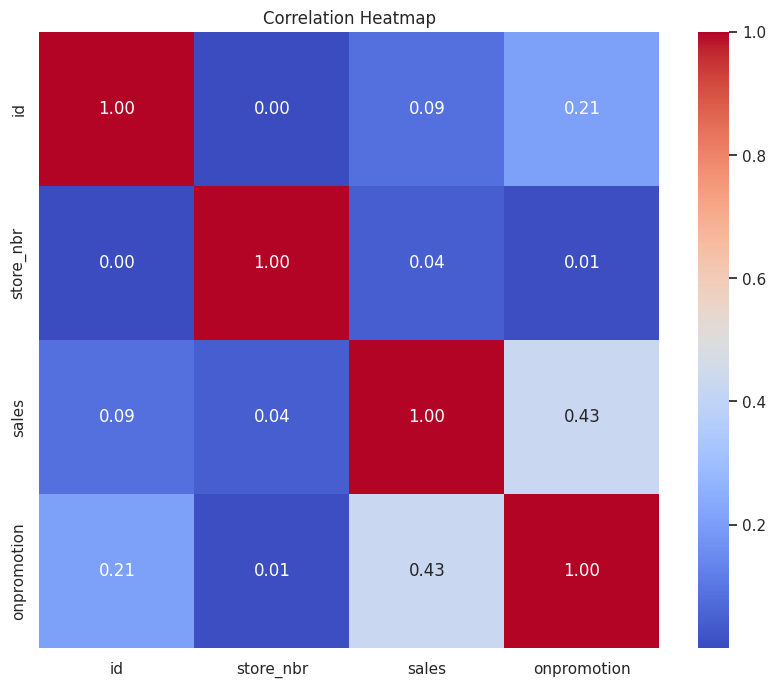

In [5]:
# Check data types of columns
print("\nData types of columns:")
print(train_data.dtypes)

# Select only numeric columns for correlation
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix only for numeric columns
correlation_matrix = train_data[numeric_cols].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [12]:
#Step 4: Identify Features and Target
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# 1. Feature Engineering - One-Hot Encoding for categorical variables
encoder = OneHotEncoder(drop='first')  # Removed sparse parameter
encoded_family = encoder.fit_transform(train_data[['family']])
encoded_family_df = pd.DataFrame(encoded_family.toarray(), columns=encoder.get_feature_names_out(['family']))

# 2. Combine encoded features with the original DataFrame
train_data_encoded = pd.concat([train_data, encoded_family_df], axis=1)
train_data_encoded.drop(columns=['family', 'id', 'date'], inplace=True)  # Drop original categorical columns

# 3. Splitting the Data
X = train_data_encoded.drop(columns=['sales'])
y = train_data_encoded['sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scaling the features (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train_scaled.shape)
print("Validation set shape:", X_val_scaled.shape)


Training set shape: (2400710, 38)
Validation set shape: (600178, 38)


In [ ]:
!pip install xgboost


In [13]:
#Step5:Model Definition and Early Stopping
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dval = xgb.DMatrix(X_val_scaled, label=y_val)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_val_pred = model.predict(dval)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation Mean Squared Error: {mse:.2f}")


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:18:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Mean Squared Error: 150064.09


In [14]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the model
xgb_model = XGBRegressor(objective='reg:squarederror', seed=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [50, 100]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best validation MSE: {-grid_search.best_score_:.2f}")


Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best validation MSE: 143279.80


In [15]:
!pip install --upgrade xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 9.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 7.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3


In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define the model
xgb_model = XGBRegressor(objective='reg:squarederror', seed=42, max_depth=5, learning_rate=0.2, n_estimators=100)

# Track validation performance manually for early stopping
min_mse = float('inf')
rounds_without_improvement = 0
early_stopping_rounds = 10
best_iteration = 0

for n in range(1, xgb_model.n_estimators + 1):
    xgb_model.n_estimators = n
    xgb_model.fit(X_train_scaled, y_train)

    # Make predictions and calculate validation MSE
    y_val_pred = xgb_model.predict(X_val_scaled)
    mse = mean_squared_error(y_val, y_val_pred)
    print(f"Iteration {n}: Validation MSE = {mse:.2f}")
    if mse < min_mse:
        min_mse = mse
        best_iteration = n
        rounds_without_improvement = 0
    else:
        rounds_without_improvement += 1

    if rounds_without_improvement >= early_stopping_rounds:
        print(f"Early stopping after {n} rounds. Best iteration: {best_iteration} with MSE: {min_mse:.2f}")
        break


Iteration 1: Validation MSE = 929562.96
Iteration 2: Validation MSE = 727629.52
Iteration 3: Validation MSE = 593914.31
Iteration 4: Validation MSE = 503108.72
Iteration 5: Validation MSE = 443450.94
Iteration 6: Validation MSE = 402241.52
Iteration 7: Validation MSE = 374468.44
Iteration 8: Validation MSE = 351628.68
Iteration 9: Validation MSE = 334205.20
Iteration 10: Validation MSE = 319189.23
Iteration 11: Validation MSE = 309827.10
Iteration 12: Validation MSE = 300943.60
Iteration 13: Validation MSE = 291514.98
Iteration 14: Validation MSE = 284602.39
Iteration 15: Validation MSE = 276489.26
Iteration 16: Validation MSE = 266291.34
Iteration 17: Validation MSE = 261729.39
Iteration 18: Validation MSE = 256162.56
Iteration 19: Validation MSE = 247700.12
Iteration 20: Validation MSE = 243308.97
Iteration 21: Validation MSE = 237938.02
Iteration 22: Validation MSE = 235992.37
Iteration 23: Validation MSE = 234598.25
Iteration 24: Validation MSE = 231486.67
Iteration 25: Validation 

In [17]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Define the RMSLE function
def rmsle(y_true, y_pred):
    y_true = np.maximum(0, y_true)
    y_pred = np.maximum(0, y_pred)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Define the model
xgb_model = XGBRegressor(objective='reg:squarederror', seed=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [50, 100]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Make predictions
y_val_pred = grid_search.best_estimator_.predict(X_val_scaled)

# Calculate RMSLE
rmsle_value = rmsle(y_val, y_val_pred)
print(f"Validation RMSLE: {rmsle_value:.4f}")


Validation RMSLE: 1.8665


In [1]:
#Step 6: Date Feature Engineering and Submission
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load your training data
train_data = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')

# Identify the target and features
X = train_data.drop(columns=['sales'])  # Assuming 'sales' is your target
y = train_data['sales']

# Convert date columns to datetime and extract useful features
# Replace 'date' with your actual date column name
date_column = 'date'
if date_column in X.columns:
    X[date_column] = pd.to_datetime(X[date_column])  # Convert to datetime
    X['year'] = X[date_column].dt.year  # Extract year
    X['month'] = X[date_column].dt.month  # Extract month
    X['day'] = X[date_column].dt.day  # Extract day
    X.drop(columns=[date_column], inplace=True)  # Drop the original date column

# Handle categorical variables (example using one-hot encoding)
X = pd.get_dummies(X)

# Split your data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform

# Scale the validation data
X_val_scaled = scaler.transform(X_val)  # Use the fitted scaler

# Define the model
xgb_model = XGBRegressor(objective='reg:squarederror', seed=42, max_depth=5, learning_rate=0.2, n_estimators=100)

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = xgb_model.predict(X_val_scaled)

# Calculate and print validation MSE
mse = mean_squared_error(y_val, y_val_pred)
print(f'Validation MSE: {mse:.2f}')

# Load your test data
test_data = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')

# Preprocess the test data in the same way as the training data
# Replace 'date' with your actual date column name in the test set
if date_column in test_data.columns:
    test_data[date_column] = pd.to_datetime(test_data[date_column])
    test_data['year'] = test_data[date_column].dt.year
    test_data['month'] = test_data[date_column].dt.month
    test_data['day'] = test_data[date_column].dt.day
    test_data.drop(columns=[date_column], inplace=True)

# Handle categorical variables in the test data
test_data = pd.get_dummies(test_data)

# Align the test data with the training data
test_data = test_data.reindex(columns=X.columns, fill_value=0)

# Scale the test data
X_test_scaled = scaler.transform(test_data)

# Make predictions on the test set
test_predictions = xgb_model.predict(X_test_scaled)

# Create the submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],  # Assuming 'id' is present in your test set
    'sales': test_predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)


Validation MSE: 186851.13
